### Data Exploration

In [1]:
#import packages
import os
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Data Import

**We import the NBA and NCAA datasets below**

*NBA Dataset*

In [ ]:
filepath = os.path.join(os.getcwd(),"..","Data","NBA","NBA_Shot_Locations_1997-2020.csv")
nba = pd.read_csv(filepath)

In [ ]:
nba.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


*NCAA Dataset*

In [2]:
filepath = os.path.join(os.getcwd(),"..","Data","NCAA")

ncaa = pd.DataFrame()

for filename in sorted(os.listdir(filepath)):
    
    if filename != ".DS_Store":
        temp = pd.read_csv(os.path.join(filepath, filename))
        ncaa = pd.concat([ncaa, temp])


In [27]:
ncaa.to_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")

In [7]:
sample = pd.read_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")

/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_99464/3682453584.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")


In [4]:
shots = sample[['game_id','load_timestamp','season','away_name','away_id','away_alias','home_name','home_id','home_alias',
               'period','game_clock','elapsed_time_sec','team_name','team_id','team_alias','team_basket','possession_team_id',
               'player_id','player_full_name','event_id','timestamp','event_coord_x','event_coord_y','event_type','type','shot_made',
               'shot_type','shot_subtype','three_point_shot','points_scored','timeout_duration']]

In [9]:
sample.columns

Index(['Unnamed: 0', 'game_id', 'load_timestamp', 'season', 'status',
       'scheduled_date', 'venue_id', 'venue_name', 'venue_city', 'venue_state',
       'venue_address', 'venue_zip', 'venue_country', 'venue_capacity',
       'attendance', 'neutral_site', 'conference_game', 'tournament',
       'tournament_type', 'round', 'game_no', 'away_market', 'away_name',
       'away_id', 'away_alias', 'away_conf_name', 'away_conf_alias',
       'away_division_name', 'away_division_alias', 'away_league_name',
       'home_market', 'home_name', 'home_id', 'home_alias', 'home_conf_name',
       'home_conf_alias', 'home_division_name', 'home_division_alias',
       'home_league_name', 'period', 'game_clock', 'elapsed_time_sec',
       'possession_arrow', 'team_name', 'team_market', 'team_id', 'team_alias',
       'team_conf_name', 'team_conf_alias', 'team_division_name',
       'team_division_alias', 'team_league_name', 'team_basket',
       'possession_team_id', 'player_id', 'player_full_name', 

### Boxscore Data Import

Data accessed via sql commands to Google Cloud BigQuery database uploaded by SportsRadar and NCAA.

In [2]:
boxscore = pd.read_csv("/Users/chejeong/Desktop/ncaa_boxscore.csv")

/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_99464/3227788668.py:1: DtypeWarning: Columns (4,7,8,9,10,11,16,21,58) have mixed types. Specify dtype option on import or set low_memory=False.
  boxscore = pd.read_csv("/Users/chejeong/Desktop/ncaa_boxscore.csv")


In [3]:
box = boxscore[['game_id', 'season', 'home_team', 'team_id', 'name', 'alias', 'opp_id', 'opp_name', 'win', 'points_game',
                'field_goals_made', 'field_goals_att', 'field_goals_pct', 'three_points_made', 'three_points_att',
                'three_points_pct', 'two_points_made', 'two_points_att', 'two_points_pct', 'free_throws_made',
                'free_throws_att','free_throws_pct', 'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
                'turnovers', 'steals', 'blocks', 'personal_fouls', 'foulouts', 'points', 'fast_break_pts', 'second_chance_pts',
                'points_off_turnovers']]

In [4]:
#filter to only home_team to avoid duplicate rows
box = box.loc[box['home_team']==True]

box.to_csv("/Users/chejeong/Desktop/ncaa_boxscore_filtered.csv")

### Shot Chart Creation

In [44]:
shots = shots.loc[shots['type'] == 'fieldgoal']
shots = shots[shots['team_basket'].notna()]


duke = shots.loc[shots['team_name'] == 'Blue Devils']
# duke = shots.loc[shots['team_name'] == 'Wildcats']

for index, row in duke.iterrows():
    
    if duke.loc[index,'team_basket'] == "right":
        duke.loc[index,'team_basket'] = "left"
        duke.loc[index,'event_coord_x'] = 1128 - duke.loc[index,'event_coord_x']
        duke.loc[index,'event_coord_y'] = 600 - duke.loc[index,'event_coord_y']

duke = duke[duke['event_coord_x'] < 564]
        
#2013 <= season <= 2017
duke_2013 = duke.loc[duke['season'] == 2013]
duke_2014 = duke.loc[duke['season'] == 2014]
duke_2015 = duke.loc[duke['season'] == 2015]
duke_2016 = duke.loc[duke['season'] == 2016]
duke_2017 = duke.loc[duke['season'] == 2017]


In [49]:
duke = shots.loc[shots['team_name'] == 'Blue Devils']

for index, row in duke.iterrows():
    
    if duke.loc[index,'team_basket'] == "right":
        duke.loc[index,'team_basket'] = "left"
        duke.loc[index,'event_coord_x'] = 1128 - duke.loc[index,'event_coord_x']
        duke.loc[index,'event_coord_y'] = 600 - duke.loc[index,'event_coord_y']

duke = duke[duke['event_coord_x'] < 564]
        
#2013 <= season <= 2017
duke_2013 = duke.loc[duke['season'] == 2013]
duke_2014 = duke.loc[duke['season'] == 2014]
duke_2015 = duke.loc[duke['season'] == 2015]
duke_2016 = duke.loc[duke['season'] == 2016]
duke_2017 = duke.loc[duke['season'] == 2017]

In [46]:
from matplotlib.patches import Circle, Rectangle, Arc

#event_coord_x: The location of the play in number of inches from the "left" baseline, max 1128
#event_coord_y: The location of the play in inches from the "top" sideline, max 600


def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of NCAA basketball court

    # Create the basketball hoop. Radius of hoop 9"
    hoop = Circle((63, 300), radius=9, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((48, 264), 2, 72, linewidth=lw, color=color)

    # The paint. width=228in, height=144in
    paint = Rectangle((0, 228), 228, 144, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((228, 300), 144, 144, theta1=270, theta2=90,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((228, 300), 144, 144, theta1=90, theta2=270,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((63, 300), 96, 96, theta1=270, theta2=90, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((0, 561.5), 109, 0, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((0, 38.5), 109, 0, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((63, 300), 531.5, 531.5, theta1=280, theta2=80, linewidth=lw,
                    color=color)

    # Center Court
    center_arc = Arc((564, 300), 144, 144, theta1=90, theta2=270,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, paint, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 0), 564, 600, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

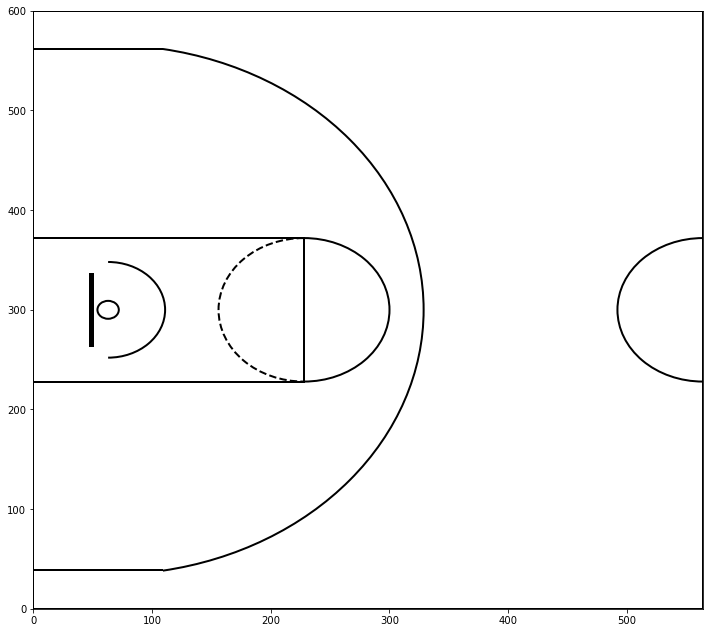

In [47]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(0,564)
plt.ylim(0,600)
plt.show()

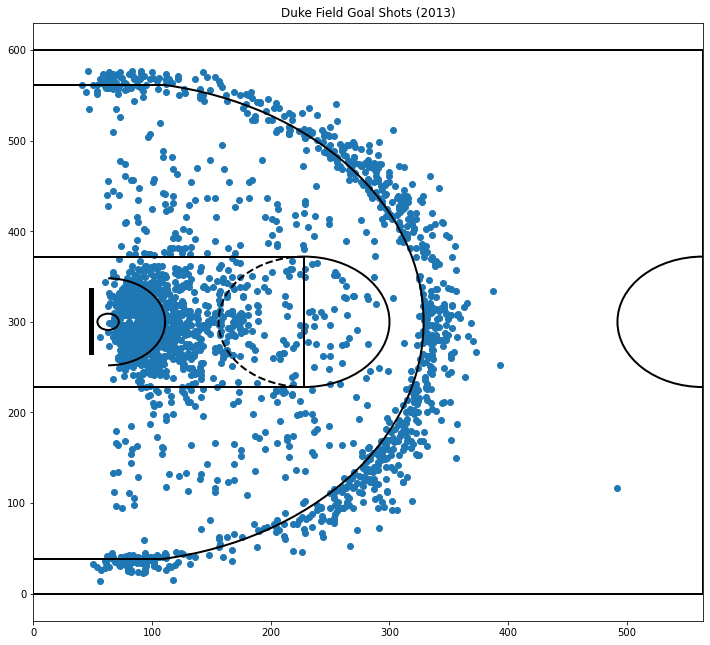

In [58]:
plt.figure(figsize=(12,11))
plt.scatter(duke_2013.event_coord_x,duke_2013.event_coord_y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(0,564)
plt.title("Duke Field Goal Shots (2013)")
plt.show()

event_coord_x: The location of the play in number of inches from the "left" baseline, max 1128

event_coord_y: The location of the play in inches from the "top" sideline, max 600

In [55]:
shots.loc[shots['team_basket']== "right"]

,game_id,load_timestamp,season,away_name,away_id,away_alias,home_name,home_id,home_alias,period,...,event_coord_x,event_coord_y,event_type,type,shot_made,shot_type,shot_subtype,three_point_shot,points_scored,timeout_duration
0,08b245ae-e35e-45b1-8184-868bd54ec163,2018-03-07 03:00:00 UTC,2017,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,Retrievers,32755362-6336-4dd3-ac34-6f72a6cc150b,UMBC,2,...,796.0,147.0,threepointmiss,fieldgoal,False,jump shot,NaN,True,NaN,NaN
1,5d3e89b0-5f06-4746-be78-2ef34350b63f,2018-02-15 17:01:09.500656 UTC,2017,Eagles,4b3ff02c-e0ba-435b-a565-6075bc491684,BC,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,2,...,195.0,410.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
2,84707465-95e5-463e-bd75-71cbacd5830c,2018-02-01 12:12:40.589349 UTC,2016,Purple Eagles,f7575278-12ec-494a-b544-427c1759d43d,NIAG,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,2,...,894.0,310.0,freethrowmiss,freethrow,False,NaN,NaN,False,NaN,NaN
4,565498b3-afbd-456a-b79b-00fc235fbf12,2018-02-02 09:06:32.705048 UTC,2015,Bulls,a9f5c9a2-342c-4881-9996-5d5c05ec9bd9,BUFF,Bobcats,327f09e2-e75f-4014-8ef7-caf9202cd583,OHIO,1,...,236.0,311.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
5,edd0aa62-7d48-4114-bcbe-9564ab2bb89d,2018-02-01 14:33:34.057652 UTC,2015,Tigers,0c0608b3-f349-4f5e-9a10-7e6a744dd0d2,AUB,Crimson,5c7bf63f-bc39-43c5-9907-73b50b7a6b34,HARV,2,...,120.0,290.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119692,19ae3719-2fc1-4d1c-960f-86f87722b19e,2018-02-01 15:09:15.094064 UTC,2014,Panthers,2c93a75d-5449-4ec1-9ca2-1e6c812399a4,UNI,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,208.0,400.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
4119693,4284387d-4929-4762-813a-6b138163a2d3,2018-02-01 15:27:22.283444 UTC,2014,Braves,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,BRAD,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,1052.0,286.0,assist,twopointmade,False,NaN,NaN,False,NaN,NaN
4119694,a7f0642e-589d-42c1-a065-bf2216196525,2018-03-10 23:35:00 UTC,2017,Cougars,1f99a164-d593-4d81-85d5-0d7889d6f486,HOU,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,253.0,78.0,personalfoul,personalfoul,False,NaN,NaN,False,NaN,NaN
4119695,0ccb6184-7abc-4035-ad14-6b2c405ee002,2018-02-02 08:34:25.766707 UTC,2016,Braves,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,BRAD,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,2,...,948.0,296.0,twopointmiss,fieldgoal,False,jump shot,NaN,False,NaN,NaN


**Data Exploration**

In [59]:
box.head()

,game_id,season,home_team,team_id,name,alias,opp_id,opp_name,win,points_game,...,assists,turnovers,steals,blocks,personal_fouls,foulouts,points,fast_break_pts,second_chance_pts,points_off_turnovers
0,4069f80e-04f0-4f69-a563-86014bbe95a0,2015,True,620d5944-7156-47d3-aad5-5b3824557d03,Toreros,USD,78434f3d-9b05-480c-b79f-4f228a0a155b,Flames,True,71,...,6.0,13.0,11.0,4.0,15.0,NaN,71.0,0.0,17.0,31.0
1,7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51,2015,True,c9570e17-c4fd-41e6-908a-1a083941319d,Tigers,PAC,78434f3d-9b05-480c-b79f-4f228a0a155b,Flames,True,88,...,26.0,17.0,11.0,5.0,16.0,NaN,88.0,21.0,16.0,30.0
2,320ccf7a-8a32-4ce6-a561-10687985c6a6,2015,True,29de4e5e-ee5b-48c8-bffc-1972e7da1e30,Spartans,SJSU,1abe928d-aec9-4133-9193-617b96ddaf42,Warriors,True,128,...,28.0,11.0,14.0,6.0,10.0,NaN,128.0,26.0,16.0,36.0
3,1a689aee-fec2-49df-822d-993e2826744b,2017,True,db6e1cab-3fa3-4a93-a673-8b2a358ff4bf,Bears,BAY,08d2a0d1-323b-4cd3-92f0-63d1a0d446e5,Saints,True,105,...,31.0,13.0,5.0,7.0,15.0,0.0,105.0,8.0,21.0,16.0
4,6314105c-8456-4b35-bfbf-1ec04749ff09,2017,True,2a997096-a381-469d-a7e9-9e031c8b071c,Sycamores,INST,e8ca4d5e-b370-4cda-be1b-c8970089449e,Greyhounds,True,79,...,9.0,10.0,8.0,3.0,18.0,1.0,79.0,8.0,15.0,19.0


In [74]:
threeAtt = box.groupby('season').agg({'three_points_att':'mean', 'three_points_pct':'mean'})
threeAtt

,three_points_att,three_points_pct
season,,
2013,18.045478,35.162791
2014,18.609407,35.125927
2015,20.579062,35.275248
2016,21.174422,35.847673
2017,21.990173,35.859993


In [73]:
box.columns

Index(['game_id', 'season', 'home_team', 'team_id', 'name', 'alias', 'opp_id',
       'opp_name', 'win', 'points_game', 'field_goals_made', 'field_goals_att',
       'field_goals_pct', 'three_points_made', 'three_points_att',
       'three_points_pct', 'two_points_made', 'two_points_att',
       'two_points_pct', 'free_throws_made', 'free_throws_att',
       'free_throws_pct', 'offensive_rebounds', 'defensive_rebounds',
       'rebounds', 'assists', 'turnovers', 'steals', 'blocks',
       'personal_fouls', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'points_off_turnovers'],
      dtype='object')

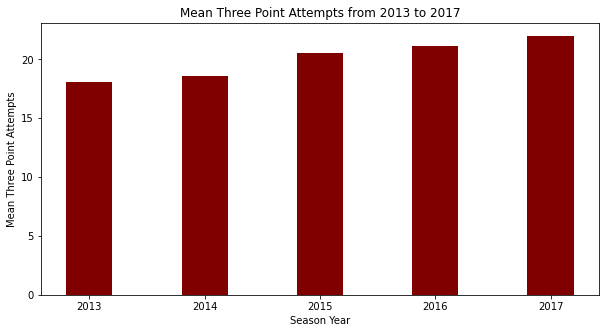

In [72]:
data = {'2013':18.05, '2014':18.61, '2015':20.58,
        '2016':21.17, '2017':21.99}
years = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years, values, color ='maroon',
        width = 0.4)
 
    
plt.xlabel("Season Year")
plt.ylabel("Mean Three Point Attempts")
plt.title("Mean Three Point Attempts from 2013 to 2017")
plt.show()

*Convert Dependent Variable to 0 and 1*

In [5]:
for index, value in box.iterrows():
    
    if box.loc[index,'win'] == True:
        box.loc[index,'win'] = 1
    else:
        box.loc[index,'win'] = 0


In [6]:
box.to_csv("/Users/chejeong/Desktop/ncaa_boxscore_filtered2.csv")